# OK I fixed it lol

1.03 Hz
15.57 32


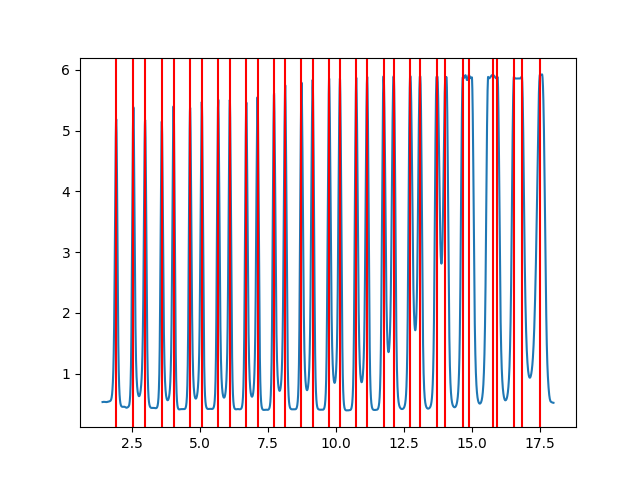

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%matplotlib widget

lmap = lambda f,x : list(map(f, x))

peaks_s = 0
peaks_e = 0

samples_per_sec = 200
with open("./kyvadlo.csv", "r") as read:
    # DATA
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    xdata = lmap(lambda row: float(row[0]), data)
    ydata = lmap(lambda row: float(row[1]), data)
    mov = 15
    ydata_clean = np.convolve(ydata, np.ones(mov)/mov, "same")

    # plt.plot(xdata, ydata)
    samples_per_sec = (len(xdata) / max(xdata))

    peaks, heights = sig.find_peaks(
        ydata_clean,
        height=1,
        threshold=0.0001,
        distance=35
    )
    peaks_s = peaks[0] - int(samples_per_sec / 2)
    peaks_e = peaks[-1] + int(samples_per_sec / 2)

    plt.plot(
        xdata[peaks_s: peaks_e], 
        ydata_clean[peaks_s: peaks_e]
    )

    f = 1/2 * (len(peaks) / ((max(peaks) - min(peaks)) / samples_per_sec))
    print(f"{f:.2f} Hz") 
    print(max(peaks)/200 - min(peaks)/200, len(peaks)) 

    for p in peaks:
        plt.axvline(p / samples_per_sec, color="r")


$$
f = 1.03Hz \\
\omega = 2*\pi*f \\
\omega = \sqrt{\frac{g}{L}} \\
L = \frac{g}{\omega^2} = \frac{I}{mr} \\
I = \frac{mrg}{\omega^2} \\
I = 4.52524 \cdot 10^{-5} kg \cdot m^2
$$

# Nefunkční fft

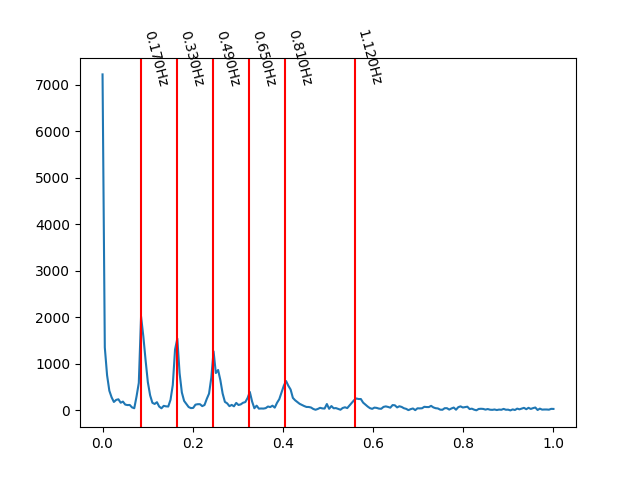

In [2]:
out = np.fft.fft(ydata[peaks_s:peaks_e])
out = lmap(lambda x: np.abs(x), out)

st = 0
et = 1

plt.figure()
plt.plot(
    np.linspace(st, et, int((et - st) * samples_per_sec)),
    out[int(st * samples_per_sec) : int(et * samples_per_sec)],
)

peaks, heights = sig.find_peaks(
    out[int(st * samples_per_sec) : int(et * samples_per_sec)],
    height=200,
    threshold=5,
    distance=int(0.08 * samples_per_sec),
)

for p in peaks:
    plt.axvline(p / samples_per_sec, color="r")
    plt.text(p / samples_per_sec, 7000, f"{(p/samples_per_sec * (2)):.3f}Hz", rotation=-75)